<a href="https://colab.research.google.com/github/osohyun0224/BigData-Final-Project/blob/master/MedicalData_Analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://drive.google.com/file/d/1GIaHWMhNmtB6AzJL77DmtO_qY2yVTQtS/view?usp=drive_link
system("gdown --id 1GIaHWMhNmtB6AzJL77DmtO_qY2yVTQtS")
system("ls", TRUE)

[1] "healthcare_dataset.csv" "sample_data"

In [3]:
data <- read.csv("healthcare_dataset.csv")

In [5]:
str(data)

'data.frame':	10000 obs. of  15 variables:
 $ Name              : chr  "Tiffany Ramirez" "Ruben Burns" "Chad Byrd" "Antonio Frederick" ...
 $ Age               : int  81 35 61 49 51 41 82 55 33 39 ...
 $ Gender            : chr  "Female" "Male" "Male" "Male" ...
 $ Blood.Type        : chr  "O-" "O+" "B-" "B-" ...
 $ Medical.Condition : chr  "Diabetes" "Asthma" "Obesity" "Asthma" ...
 $ Date.of.Admission : chr  "2022-11-17" "2023-06-01" "2019-01-09" "2020-05-02" ...
 $ Doctor            : chr  "Patrick Parker" "Diane Jackson" "Paul Baker" "Brian Chandler" ...
 $ Hospital          : chr  "Wallace-Hamilton" "Burke, Griffin and Cooper" "Walton LLC" "Garcia Ltd" ...
 $ Insurance.Provider: chr  "Medicare" "UnitedHealthcare" "Medicare" "Medicare" ...
 $ Billing.Amount    : num  37491 47304 36875 23303 18086 ...
 $ Room.Number       : int  146 404 292 480 477 180 161 384 215 310 ...
 $ Admission.Type    : chr  "Elective" "Emergency" "Emergency" "Urgent" ...
 $ Discharge.Date    : chr  "2022-12

In [6]:
install.packages("tidyverse")
library(tidyverse)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [7]:
library(repr)

In [8]:
df <- fread("healthcare_dataset.csv") %>% as_tibble()

In [9]:
summary(df)

     Name                Age           Gender           Blood Type       
 Length:10000       Min.   :18.00   Length:10000       Length:10000      
 Class :character   1st Qu.:35.00   Class :character   Class :character  
 Mode  :character   Median :52.00   Mode  :character   Mode  :character  
                    Mean   :51.45                                        
                    3rd Qu.:68.00                                        
                    Max.   :85.00                                        
 Medical Condition  Date of Admission       Doctor            Hospital        
 Length:10000       Min.   :2018-10-30   Length:10000       Length:10000      
 Class :character   1st Qu.:2020-02-10   Class :character   Class :character  
 Mode  :character   Median :2021-05-02   Mode  :character   Mode  :character  
                    Mean   :2021-05-01                                        
                    3rd Qu.:2022-07-23                                        
        

In [10]:
install.packages("psych")
library("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [11]:
describe(df)
describe(df) %>% round(.,2)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Name*,1,10000,4693.6494,2.697154e+03,4684.50,4694.821125,3453.7167,1.000,9378.0,9377.00,-0.003609734,-1.192705,2.697154e+01
Age,2,10000,51.4522,1.958897e+01,52.00,51.489000,25.2042,18.000,85.0,67.00,-0.012144215,-1.205294,1.958897e-01
Gender*,3,10000,1.4925,4.999687e-01,1.00,1.490625,0.0000,1.000,2.0,1.00,0.029998875,-1.999300,4.999687e-03
Blood Type*,4,10000,4.4993,2.286596e+00,4.00,4.499125,2.9652,1.000,8.0,7.00,0.004015200,-1.233060,2.286596e-02
Medical Condition*,5,10000,3.4875,1.701803e+00,3.00,3.484375,1.4826,1.000,6.0,5.00,0.013486678,-1.265853,1.701803e-02
Date of Admission,6,10000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Doctor*,7,10000,4713.6510,2.713557e+03,4703.50,4714.490750,3479.6622,1.000,9416.0,9415.00,-0.003422827,-1.195984,2.713557e+01
Hospital*,8,10000,4350.3075,2.500044e+03,4342.50,4356.464875,3213.5355,1.000,8639.0,8638.00,-0.016235504,-1.197810,2.500044e+01
Insurance Provider*,9,10000,2.9799,1.413045e+00,3.00,2.974875,1.4826,1.000,5.0,4.00,0.025553380,-1.294003,1.413045e-02


Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Name*,1,10000,4693.65,2697.15,4684.50,4694.82,3453.72,1.00,9378.0,9377.00,0.00,-1.19,26.97
Age,2,10000,51.45,19.59,52.00,51.49,25.20,18.00,85.0,67.00,-0.01,-1.21,0.20
Gender*,3,10000,1.49,0.50,1.00,1.49,0.00,1.00,2.0,1.00,0.03,-2.00,0.00
Blood Type*,4,10000,4.50,2.29,4.00,4.50,2.97,1.00,8.0,7.00,0.00,-1.23,0.02
Medical Condition*,5,10000,3.49,1.70,3.00,3.48,1.48,1.00,6.0,5.00,0.01,-1.27,0.02
Date of Admission,6,10000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Doctor*,7,10000,4713.65,2713.56,4703.50,4714.49,3479.66,1.00,9416.0,9415.00,0.00,-1.20,27.14
Hospital*,8,10000,4350.31,2500.04,4342.50,4356.46,3213.54,1.00,8639.0,8638.00,-0.02,-1.20,25.00
Insurance Provider*,9,10000,2.98,1.41,3.00,2.97,1.48,1.00,5.0,4.00,0.03,-1.29,0.01


In [12]:
summary(data)

     Name                Age           Gender           Blood.Type       
 Length:10000       Min.   :18.00   Length:10000       Length:10000      
 Class :character   1st Qu.:35.00   Class :character   Class :character  
 Mode  :character   Median :52.00   Mode  :character   Mode  :character  
                    Mean   :51.45                                        
                    3rd Qu.:68.00                                        
                    Max.   :85.00                                        
 Medical.Condition  Date.of.Admission     Doctor            Hospital        
 Length:10000       Length:10000       Length:10000       Length:10000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

결측치가 있는 지 확인하고 처리하는 과정을 수행한다.

In [13]:
#결측치가 있는 행을 제거한다.
data <- na.omit(data)

이상치가 있는지 탐색하고 제거하는 과정을 수행한다.

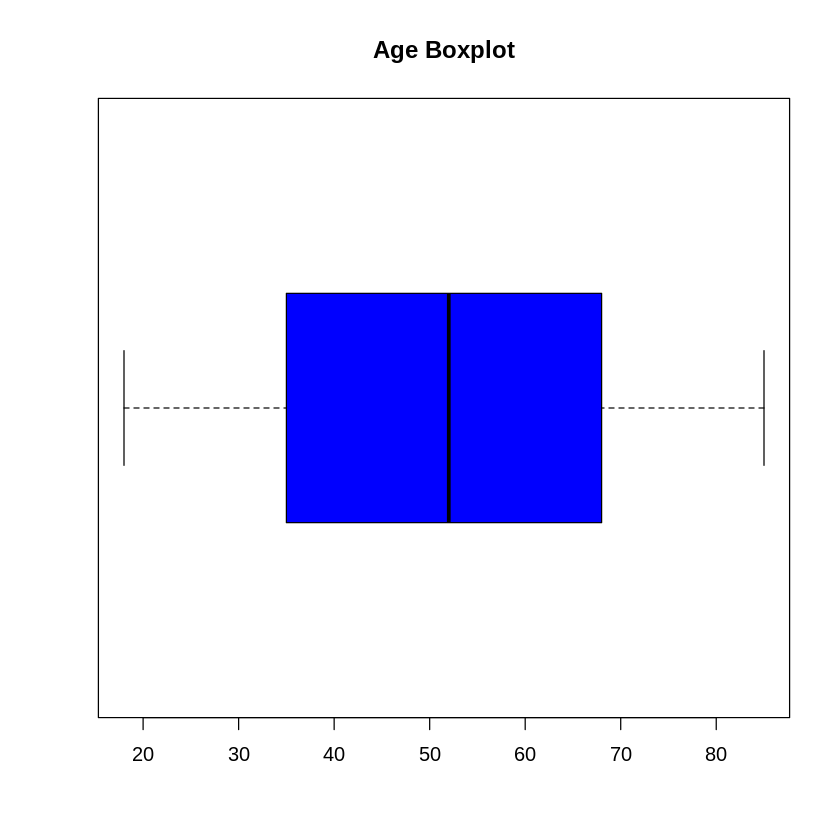

In [14]:
# Age의 이상치 확인
boxplot(data$Age, main="Age Boxplot", horizontal=TRUE, col="blue")

In [15]:
# IQR 계산
Q1 <- quantile(data$Age, 0.25)
Q3 <- quantile(data$Age, 0.75)
IQR <- Q3 - Q1

# 이상치 경계값 계산
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# 결과 출력
print(paste("Lower bound:", lower_bound))
print(paste("Upper bound:", upper_bound))


[1] "Lower bound: -14.5"
[1] "Upper bound: 117.5"


위의 데이터 셋은 10대부터 80대까지의 나이 정보가 있습니다. 따라서 이상치를 결측할때 실제 데이터 값의 범위를 반영하지 않으므로 이상치가 실제 데이터 범위와 가깝게 나오지 않았습니다.

이에는 여러가지 원인이 있을 수 있습니다. 제가 생각하기에는 해당 데이터가 중앙에 집중되어있기 때문에 균등하게 분포되어있어 실제 데이터 범위에서 크게 벗어난 이상치 경계값이 계산 된 것 같다고 생각합니다.

In [16]:
# 이상치 제거
data_filtered <- data[data$Age >= 10 & data$Age <= 90, ]   # 일반적으로 나이는 10세 이상 90세 이하로 설정

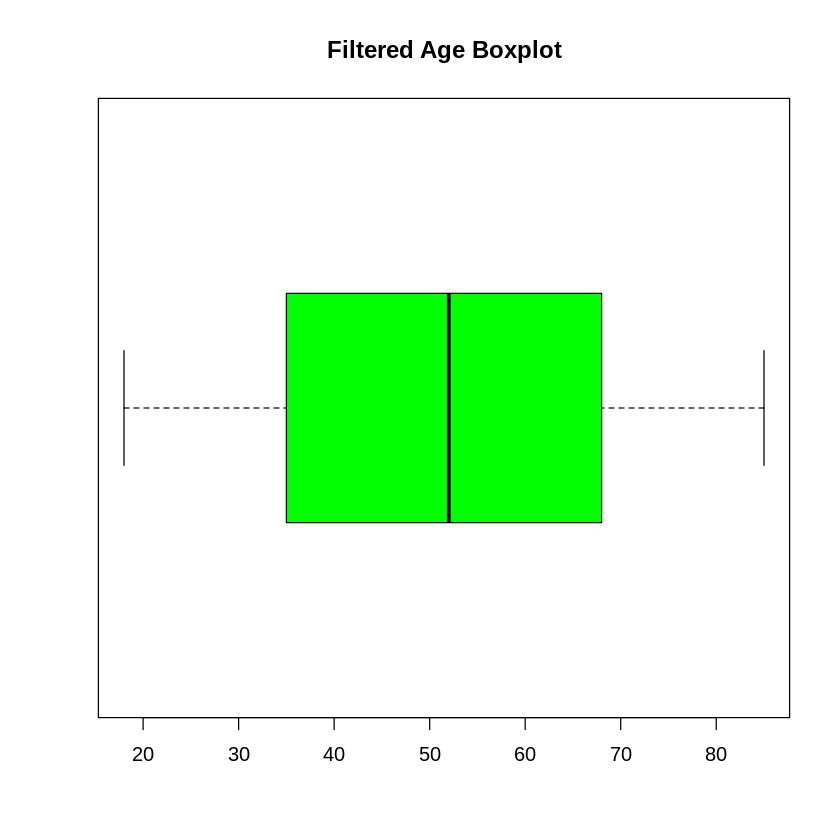

In [17]:
# 이상치 제거 후 데이터 분포 확인
boxplot(data_filtered$Age, main="Filtered Age Boxplot", horizontal=TRUE, col="green")

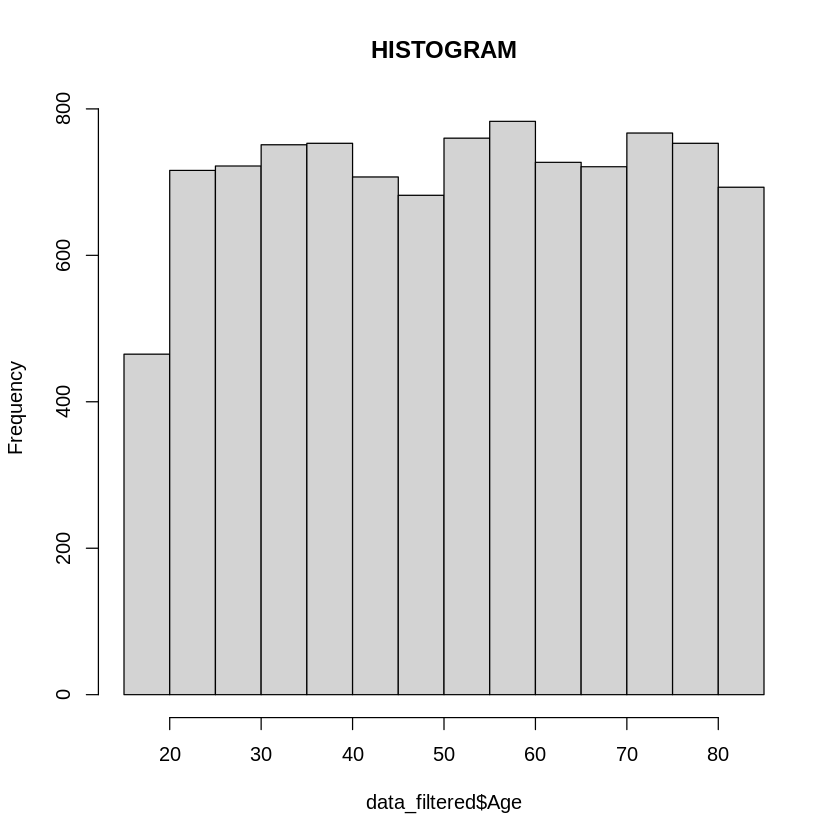

In [18]:
hist(x=data_filtered$Age, main ='HISTOGRAM')

위의 데이터 분포를 통해 데이터의 대부분이 30대에서 60대 사이에 분포하는 것으로 보입니다.
10대와 80대까지 있는 것으로 확인을 하였고, 10대의 비율이 적은 것을 확인했습니다.
나이 데이터의 요약 통계와 최소값 최대값을 확인하려고 합니다.

In [23]:
# 나이 데이터의 요약 통계 확인
summary(data$Age)

# 나이 데이터의 최소값과 최대값 확인
min(data$Age)
max(data$Age)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   35.00   52.00   51.45   68.00   85.00 

[1] 18

[1] 85

### 병원 청구 금액에 대한 데이터 정제

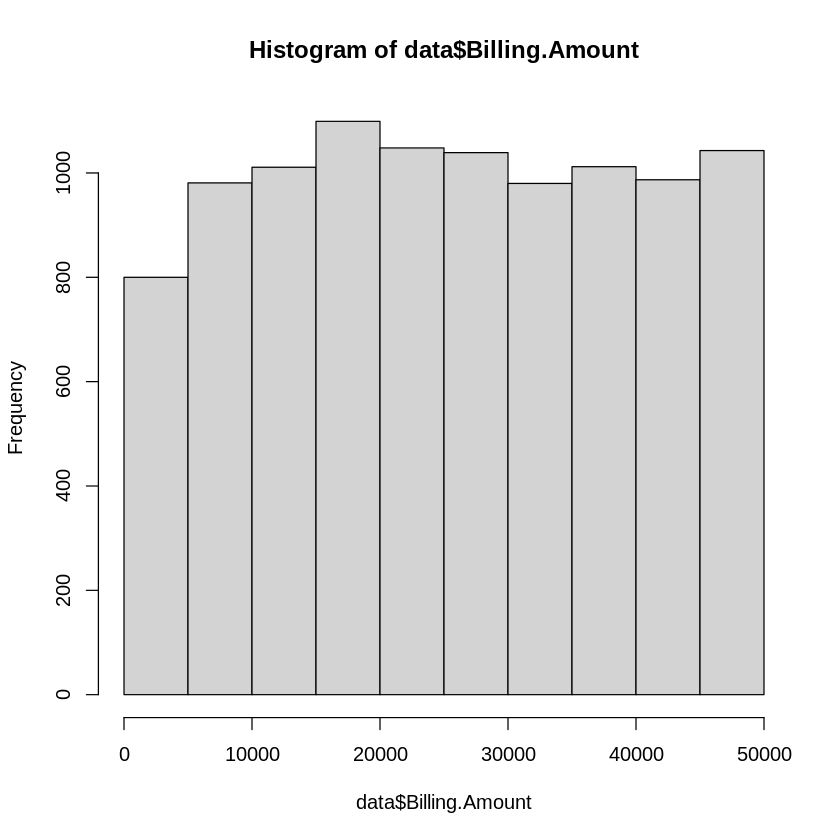

In [21]:
# 히스토그램으로 나타낸 병원 청구 금액 데이터 분포
hist(data$Billing.Amount)

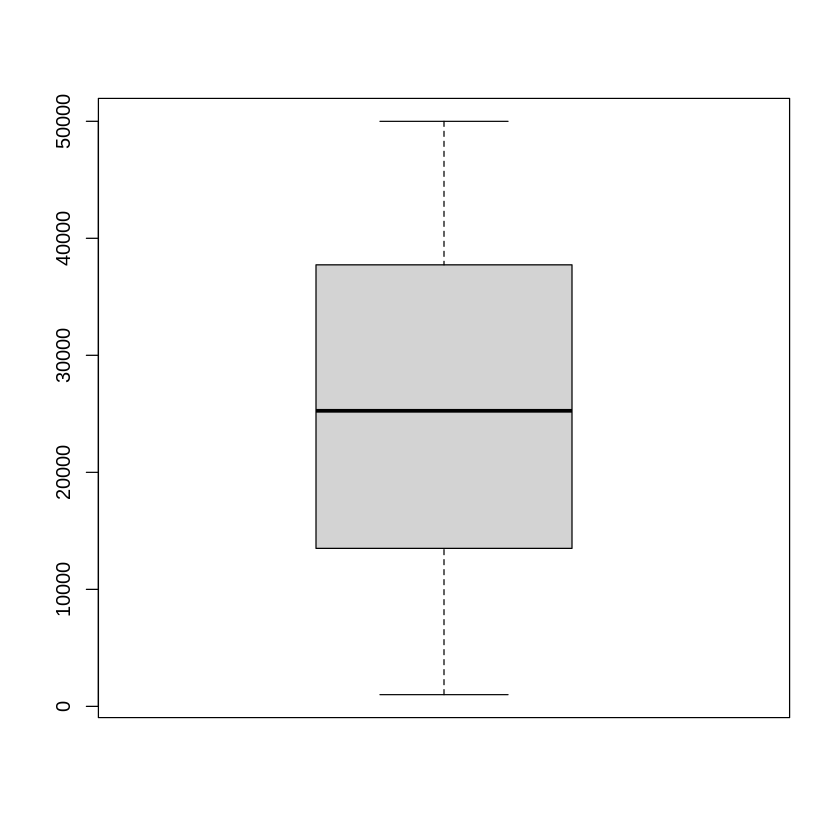

In [22]:
# 박스플롯으로 나타낸 병원 청구 금액 데이터 분포
boxplot(data$Billing.Amount)

# 선형회귀모델

In [25]:
linear_model <- lm(Billing.Amount ~ Age, data = data)
summary(linear_model)


Call:
lm(formula = Billing.Amount ~ Age, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24677.9 -12019.7   -237.8  12251.2  24656.8 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25867.206    395.382  65.423   <2e-16 ***
Age            -6.810      7.182  -0.948    0.343    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14070 on 9998 degrees of freedom
Multiple R-squared:  8.993e-05,	Adjusted R-squared:  -1.008e-05 
F-statistic: 0.8992 on 1 and 9998 DF,  p-value: 0.343


## 선형 회귀 모델의 요약 결과 분석



1.   요약 설명: Billing.Amount를 종속 변수로, Age를 독립 변수로 사용하여 구축하였음
2.   계수:
- Intercept  Estimate: 절편의 추정값은 약 25,867.206입니다. 이는 나이(Age)가 0세일 때 예상되는 청구 금액의 평균값을 나타냅니다. 이 값은 통계적으로 유의미하다고 생각했습니다. (p < 0.001)
- Age Estimate: 나이의 추정 계수는 약 -6.810입니다. 이는 나이가 한 살 증가할 때마다 청구 금액이 평균적으로 6.81만큼 감소한다는 것을 나타냅니다. 그러나 이 계수는 통계적으로 유의미하지 하지 않다고 생각했습니다. (p = 0.343).





3.   t값과 p값에 대하여:
나이(Age)의 t 값은 -0.948이며, 이는 나이가 청구 금액에 미치는 영향이 통계적으로 유의하지 않다는 것을 나타냅니다. (p = 0.343). 일반적으로 p 값이 0.05 미만일 때 통계적으로 유의하다고 간주하기에 따라서 이 경우, 귀무가설(H0)을 기각할 충분한 증거가 없어 보였습니다.

4. 결정 계수 (R-squared):
모델의 결정 계수(R-squared)는 매우 낮은 0.00008993입니다. 이는 모델이 데이터의 변동성을 거의 설명하지 못함을 나타냅니다. 결정 계수가 낮다는 것은 독립 변수(Age)가 종속 변수(Billing.Amount)의 변화를 잘 예측하지 못한다는 것을 의미해 보였습니다.

5. 잔차 (Residuals):
잔차의 범위는 -24,677.9에서 24,656.8까지입니다. 이는 모델이 예측한 값과 실제 값 사이에 상당한 차이가 있음을 알 수 있었습니다...

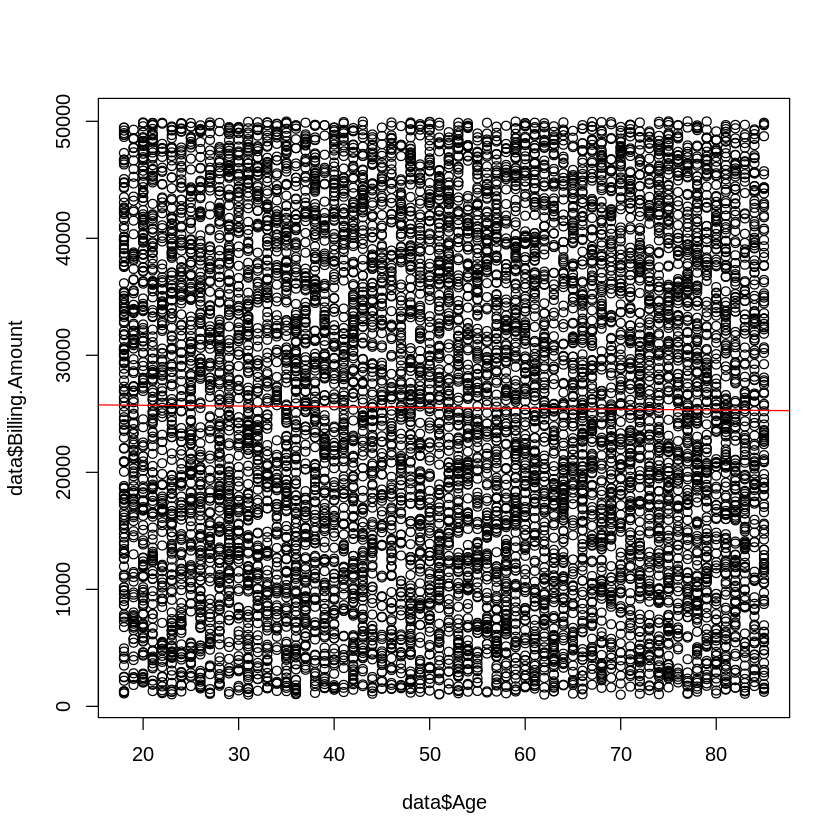

In [43]:
plot(data$Age, data$Billing.Amount)
abline(model, col="red")

위의 그래프를 확인하면 나이와 청구 금액으로만 그래프를 작성하였을 때, 그래프가 너무 가독성이 떨어지는 것을 확인했습니다.
따라서 3차원 플롯으로 그래프를 그리기로 하였습니다.


In [40]:
# scatterplot3d 패키지를 설치
install.packages("scatterplot3d")
library(scatterplot3d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
data <- data.frame(Age = runif(100, 10, 80), Billing.Amount = runif(100, 200, 50000))
model <- lm(Billing.Amount ~ Age, data = data)

# 잔차를 계산합니다.
data$residuals <- resid(model)

위의 과정은 데이터의 패턴을 더 잘 파악하기 위해 나이, 청구금액에서 추가로 잔차를 시각화하는 3차원 플롯을 그렸습니다.

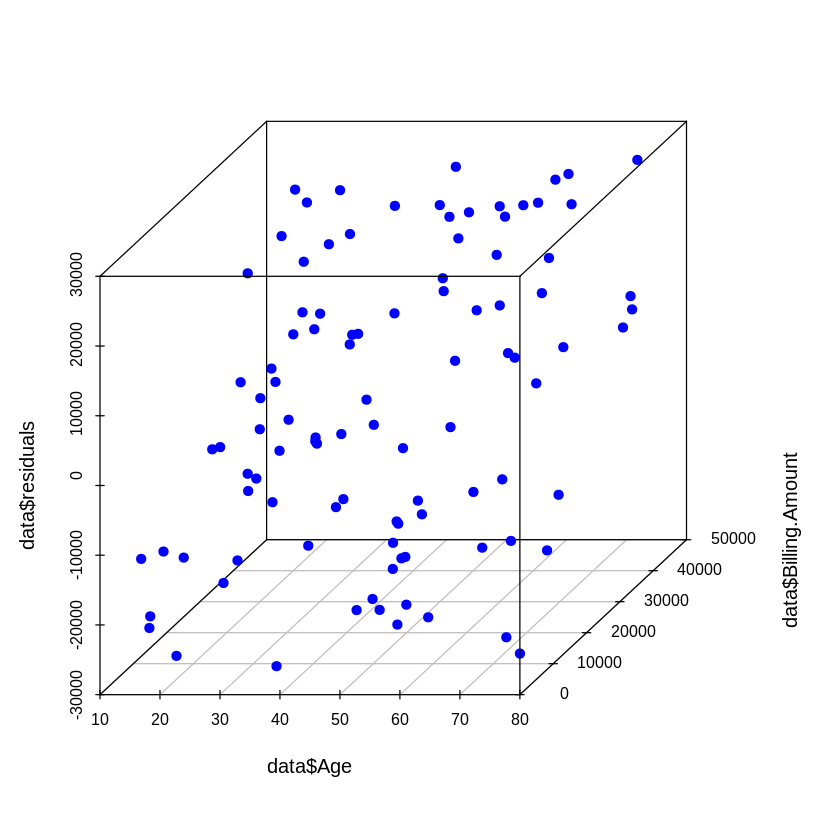

In [28]:
scatterplot3d(data$Age, data$Billing.Amount, data$residuals, color = "blue", pch = 19)

# 시도 1: 회귀 평면을 추가하였음

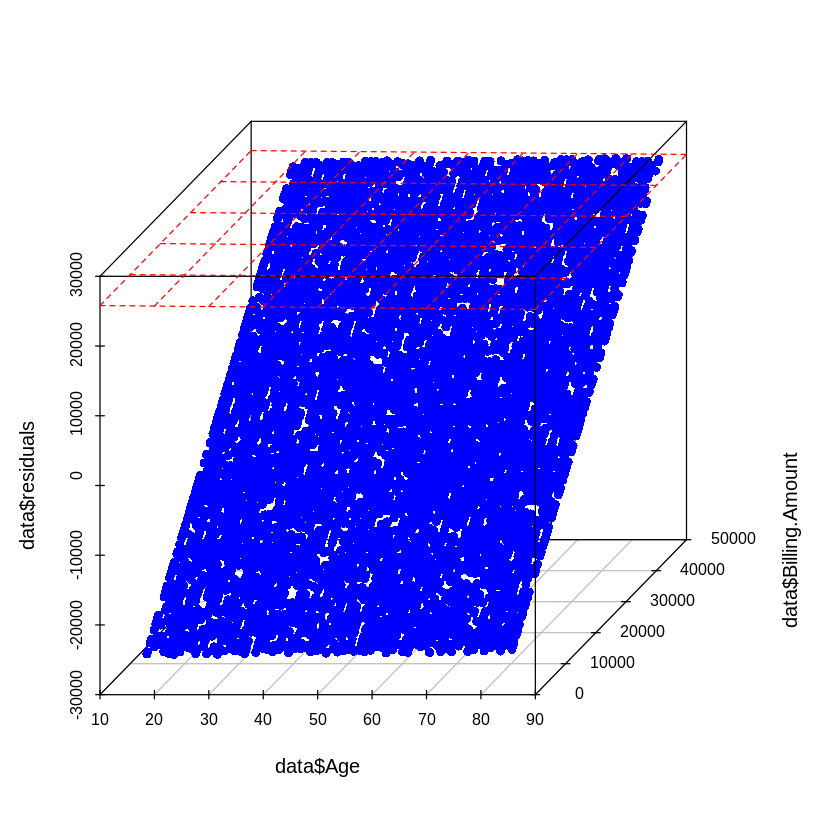

In [50]:
# 선형 회귀 모델을 구축
model <- lm(Billing.Amount ~ Age, data = data)

# 잔차를 계산합니다.
data$residuals <- resid(model)

# 3D 스캐터 플롯을 그림
s3d <- scatterplot3d(data$Age, data$Billing.Amount, data$residuals, color = "blue", pch = 16)

# 회귀 평면을 추가
intercept <- coef(model)[1]  # 절편
slope <- coef(model)[2]      # 기울기

# grid를 생성하여 회귀 평면을 그림
grid <- with(data, expand.grid(Age = seq(min(Age), max(Age), length.out = 100),
                               Billing.Amount = seq(min(Billing.Amount), max(Billing.Amount), length.out = 100)))
grid$fit <- intercept + slope * grid$Age

# 회귀 평면 추가 , 색상을 지정하고 투명도 옵션은 제거
s3d$plane3d(intercept, slope, 0, col = "red")


**# 최종 결론**


1. 회귀 계수

* p-value 값을 보았을 때 나이(Age)의 추정된 계수는 약 -6.810입니다. 이는 나이가 한 살 증가할 때마다 청구 금액이 평균적으로 6.81 감소한다는 것을 의미하지만, 이 계수는 통계적으로 유의미하지 않다고 결론을 내렸습니다. (p-value = 0.343)

2. t-value

* Age의 t-value는 -0.948입니다. t-value는 계수가 0이라는 귀무가설에 대한 표준 편차 단위로의 거리를 측정합니다. 여기서는 Age의 t-value가 -0.948로, 일반적으로 사용되는 임계값(±1.96 for p < 0.05)보다 작으므로 나이와 청구 금액 간에는 통계적으로 유의한 선형 관계가 없다고 결론을 내렸습니다.

3. R-squared 결정계수:
* R-squared 값은 0.00008993으로 매우 낮은 결과를 얻었습니다. 이는 모델이 데이터의 변동성을 거의 설명하지 못한다는 결론을 내게 되었습니다.

4. F-statistic:

* F-statistic은 0.8992로, 이 모델이 데이터를 잘 설명하지 못한다는 결론을 내게 되었습니다. (p-value = 0.343)

이 결과를 바탕으로, 나이와 청구 금액 간에는 통계적으로 유의미한 선형 관계가 없다는 결론을 내렸습니다. 이는 귀무가설을 기각하지 않고 받아들이는 것을 의미합니다. 데이터에 따르면 나이는 청구 금액에 유의미한 영향을 미치지 않는 것으로 보입니다.